[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-1-3a369a3982d6>:15: DtypeWarning: Columns (1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Top 10 Most Common Words:
amazon: 4737
service: 2174
delivery: 2143
customer: 2037
meals: 2024
time: 1915
get: 1810
order: 1727
would: 1585
fresh: 1545


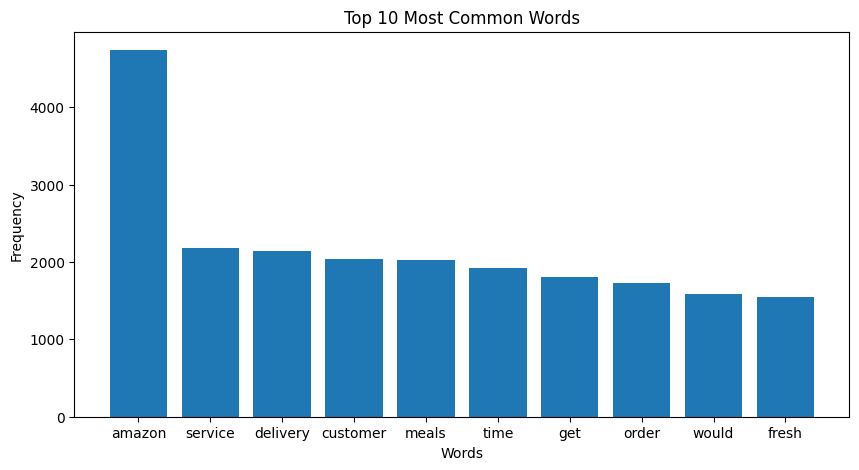

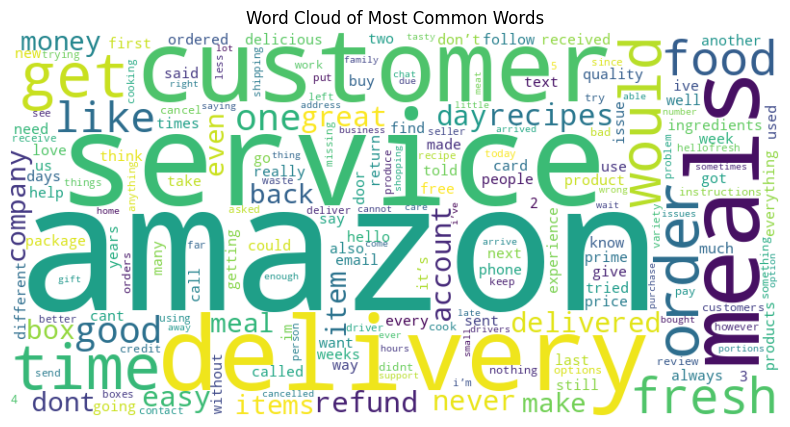

In [1]:
import pandas as pd
from collections import Counter
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the cleaned dataset
file_path = '/content/Cleaned_Combined_Reviews.csv'  # Replace with your cleaned data file path
data = pd.read_csv(file_path)

# Ensure 'Review_Text' column exists
if 'Review_Text' not in data.columns:
    print("Review_Text column is missing. Check your dataset.")
else:
    # Step 1: Preprocess text
    def preprocess_text(text):
        text = text.lower()  # Convert to lowercase
        text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
        words = text.split()
        words = [word for word in words if word not in stop_words]  # Remove stopwords
        return words

    # Apply preprocessing to reviews
    data['Processed_Review'] = data['Review_Text'].fillna("").apply(preprocess_text)

    # Combine all reviews into one list
    all_words = [word for review in data['Processed_Review'] for word in review]

    # Step 2: Calculate word frequency
    word_counts = Counter(all_words)

    # Display the top 10 most common words
    top_words = word_counts.most_common(10)
    print("Top 10 Most Common Words:")
    for word, count in top_words:
        print(f"{word}: {count}")

    # Step 3: Visualize results
    # Bar chart for top words
    top_words_dict = dict(top_words)
    plt.figure(figsize=(10, 5))
    plt.bar(top_words_dict.keys(), top_words_dict.values())
    plt.title("Top 10 Most Common Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

    # Word cloud visualization
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Most Common Words")
    plt.show()
